# Infer life satisfaction index of Cyprus 
#### in 2015 using OECD and World Bank data
Bear in mind this is non-representative data, which means the prediction won't be very accurate.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [24]:
# load the data
oecd_bli_2015 = pd.read_csv('oecd_bli_2015.csv')
gdp_per_capita = pd.read_csv('world_bank_gdp_per_capita.csv')

# inference data
gdp_cyprus = gdp_per_capita[gdp_per_capita['Country Name'] == 'Cyprus']['2015'].values

In [9]:
# prepare the data
life_satisfaction_2015 = oecd_bli_2015[oecd_bli_2015['Indicator'] == 'Life satisfaction'].groupby('LOCATION', as_index=False).mean()[['LOCATION', 'Value']].rename(columns={'LOCATION': 'Country Code', 'Value': 'Life satisfaction'})
gdp_per_capita_2015 = gdp_per_capita[['Country Code', '2015']].rename(columns={'2015': 'GDP per capita'})
country_stats = pd.merge(life_satisfaction_2015, gdp_per_capita_2015)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

51    23212.224702
Name: 2015, dtype: float64

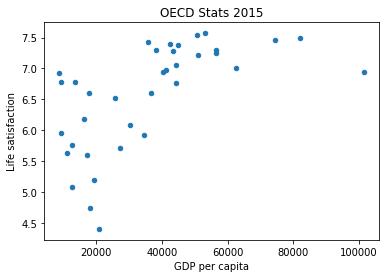

In [4]:
# visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', title='OECD Stats 2015')
plt.show()

In [5]:
# Select a linear model
lin_reg_model = sklearn.linear_model.LinearRegression()

In [6]:
# Train the model
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Make a prediction for Cyprus
X_new = [gdp_cyprus]
print(lin_reg_model.predict(X_new))

[[6.26533818]]
